In [41]:
print("fuzzy-diabetes-diagnosis")
print("Jehezkiel Beny Brian\t\t103012300241")
print("Ridwan Ramdhani\t\t\t103012300191")
print("Fairuztsani Kemal Setiawan\t103012300048")

fuzzy-diabetes-diagnosis
Jehezkiel Beny Brian		103012300241
Ridwan Ramdhani			103012300191
Fairuztsani Kemal Setiawan	103012300048


# Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read CSV

In [43]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Statistik Deskriptif Awal:**

- Jumlah sampel: 768
- Fitur numerik: 8 (Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age, Pregnancies)
- Target biner: 0 (non-diabetes), 1 (diabetes)
- Beberapa fitur memiliki nilai 0 yang tidak valid secara medis dan telah ditangani dengan imputasi menggunakan median, berdasarkan hasil analisis distribusi.

# 📊 EDA (Exploratory Data Analysis)

### Deskripsi Data: Ukuran, Fitur, dan Target

In [44]:
rows, cols = data.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 768
Jumlah kolom: 9


In [45]:
target = "Outcome"
data[target].head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cek Missing Values

In [48]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Distribusi Fitur

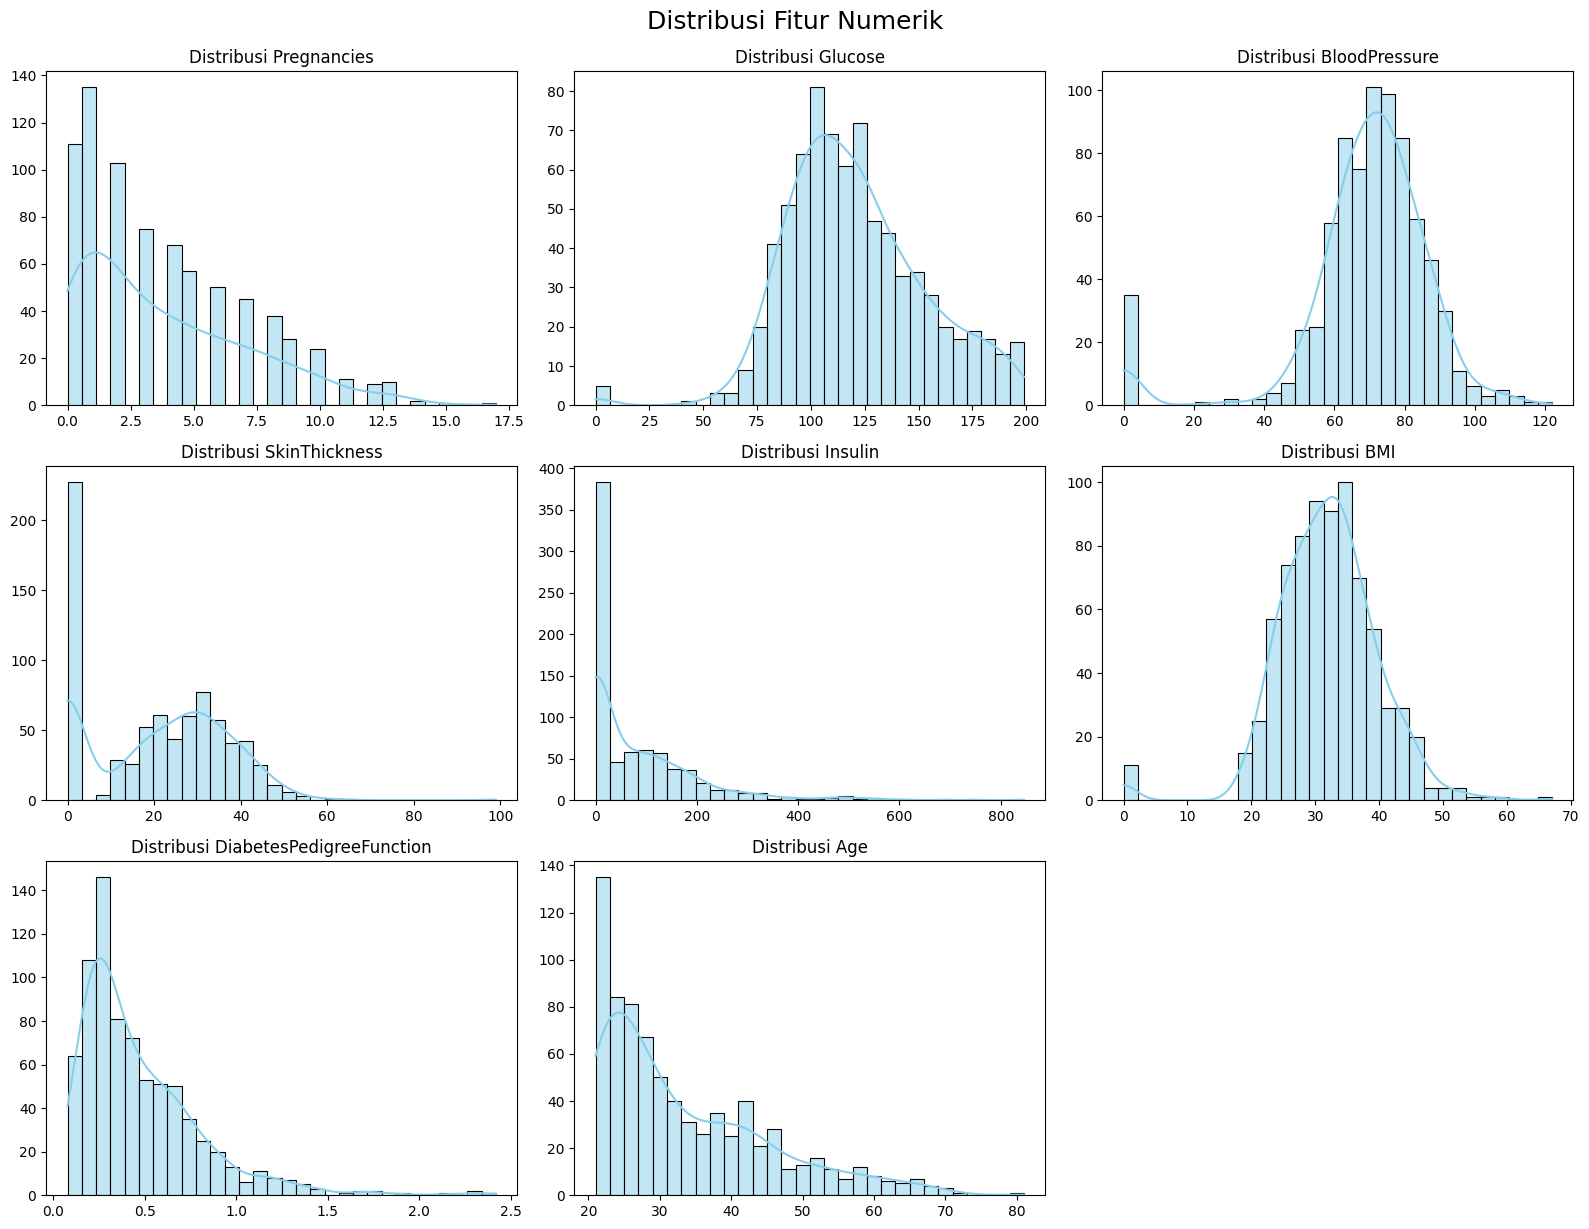

In [49]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 baris x 3 kolom subplot
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerik", fontsize=18, y=1.02)
plt.show()

### Distribusi Target

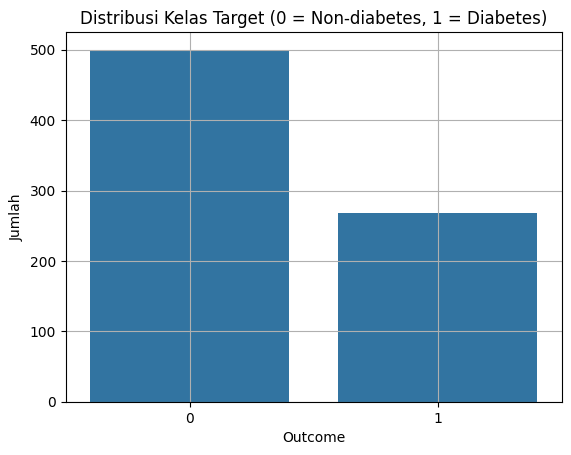

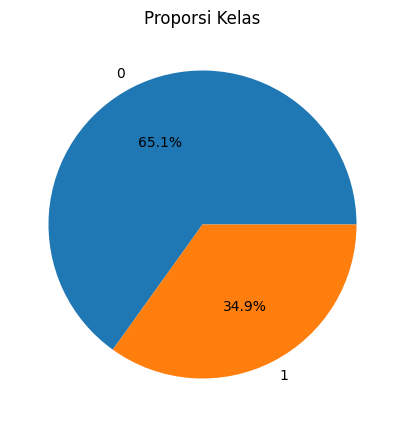

In [50]:
sns.countplot(x='Outcome', data=data)
plt.title("Distribusi Kelas Target (0 = Non-diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

# Proporsi
data['Outcome'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Proporsi Kelas')
plt.ylabel('')
plt.show()


### Korelasi Antar Fitur

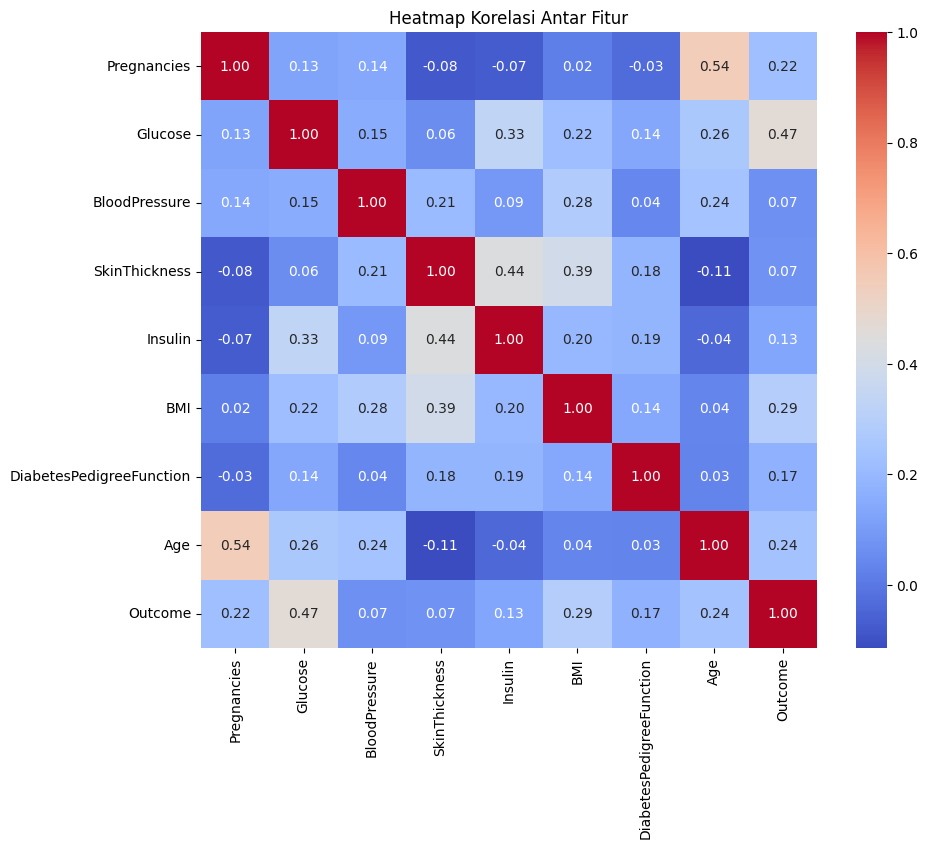

In [51]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

### Analisis Fitur terhadap Target

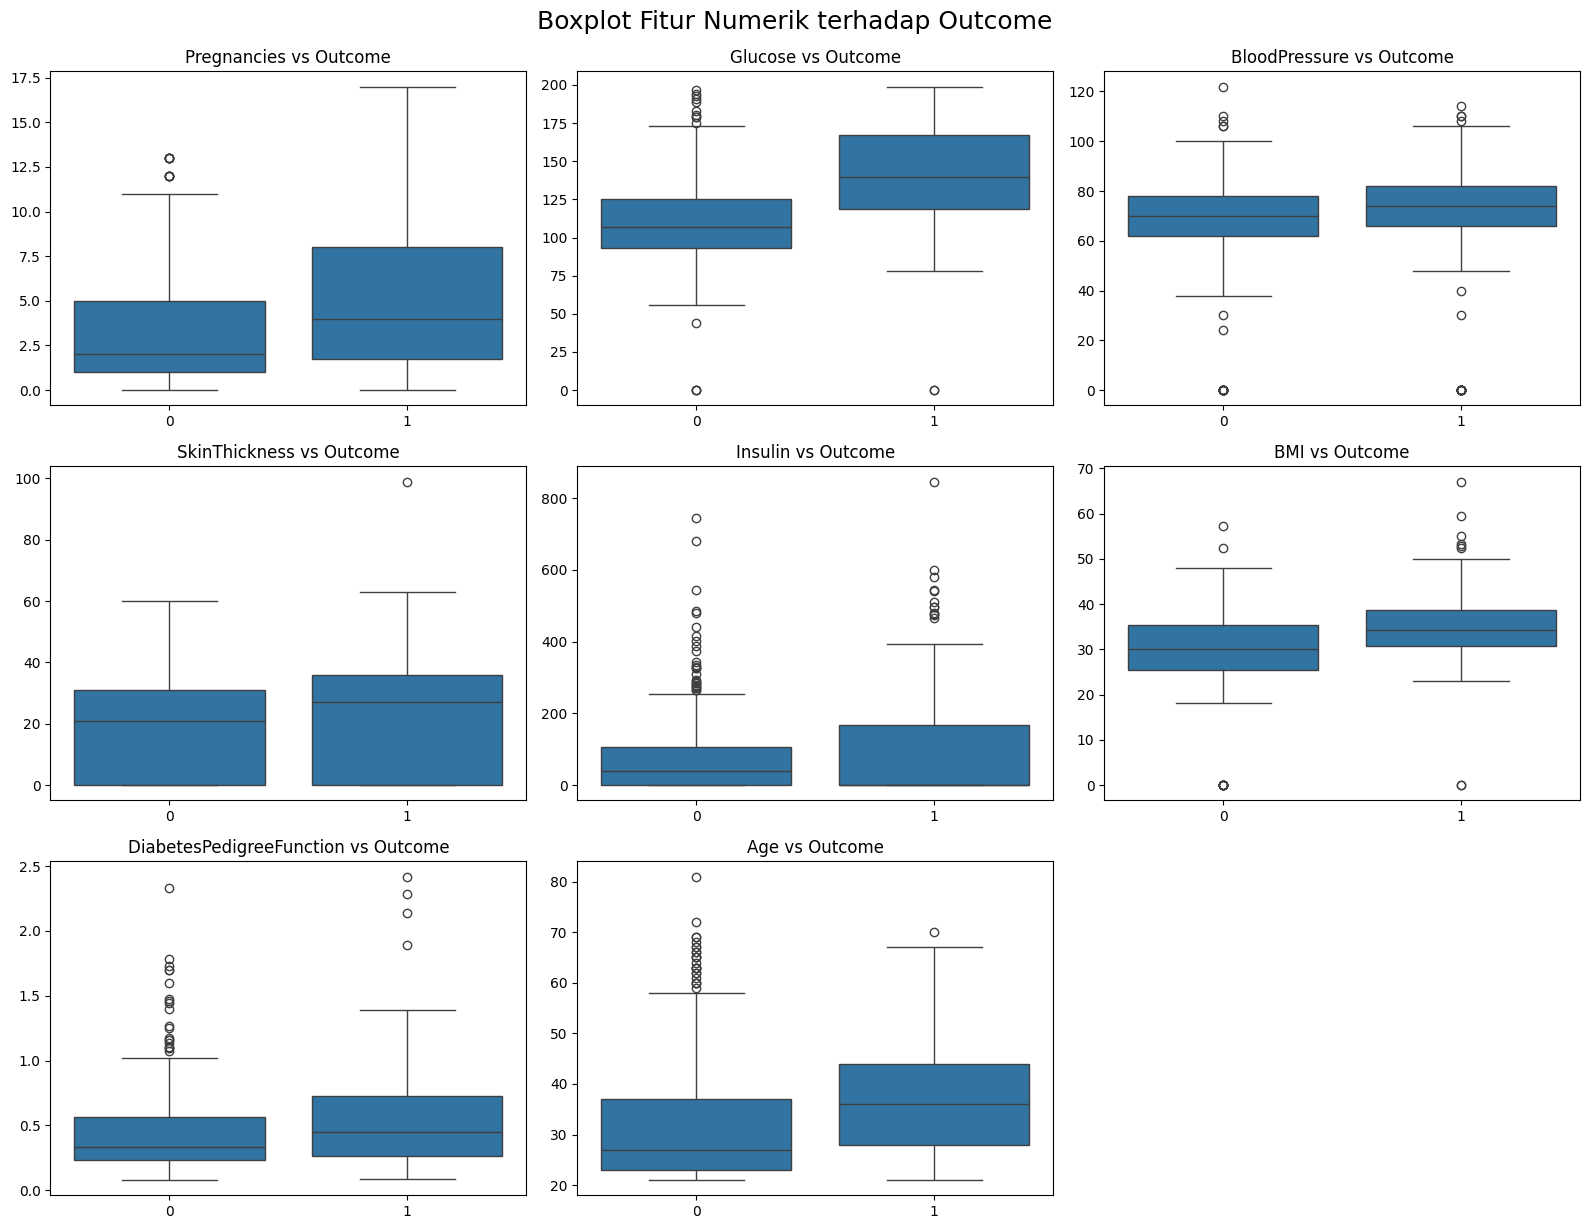

In [52]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Grid subplot 3 baris x 3 kolom
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} vs Outcome')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplot Fitur Numerik terhadap Outcome", fontsize=18, y=1.02)
plt.show()

# 🧹 Preprocessing Data

In [53]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Handling Missing Values

In [54]:
len(data)

768

In [55]:
data.isna().sum() / len(data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## Handling Invalid Values

In [56]:
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_check:
    print(f"Jumlah nilai 0 di kolom {col}: {(data[col] == 0).sum()}")

Jumlah nilai 0 di kolom Glucose: 5
Jumlah nilai 0 di kolom BloodPressure: 35
Jumlah nilai 0 di kolom SkinThickness: 227
Jumlah nilai 0 di kolom Insulin: 374
Jumlah nilai 0 di kolom BMI: 11


Analisis distribusi dilakukan menggunakan visualisasi histogram dan uji Shapiro-Wilk. Semua fitur yang invalid menunjukkan distribusi yang tidak normal, sehingga median dipilih sebagai metode imputasi yang lebih robust terhadap outlier.

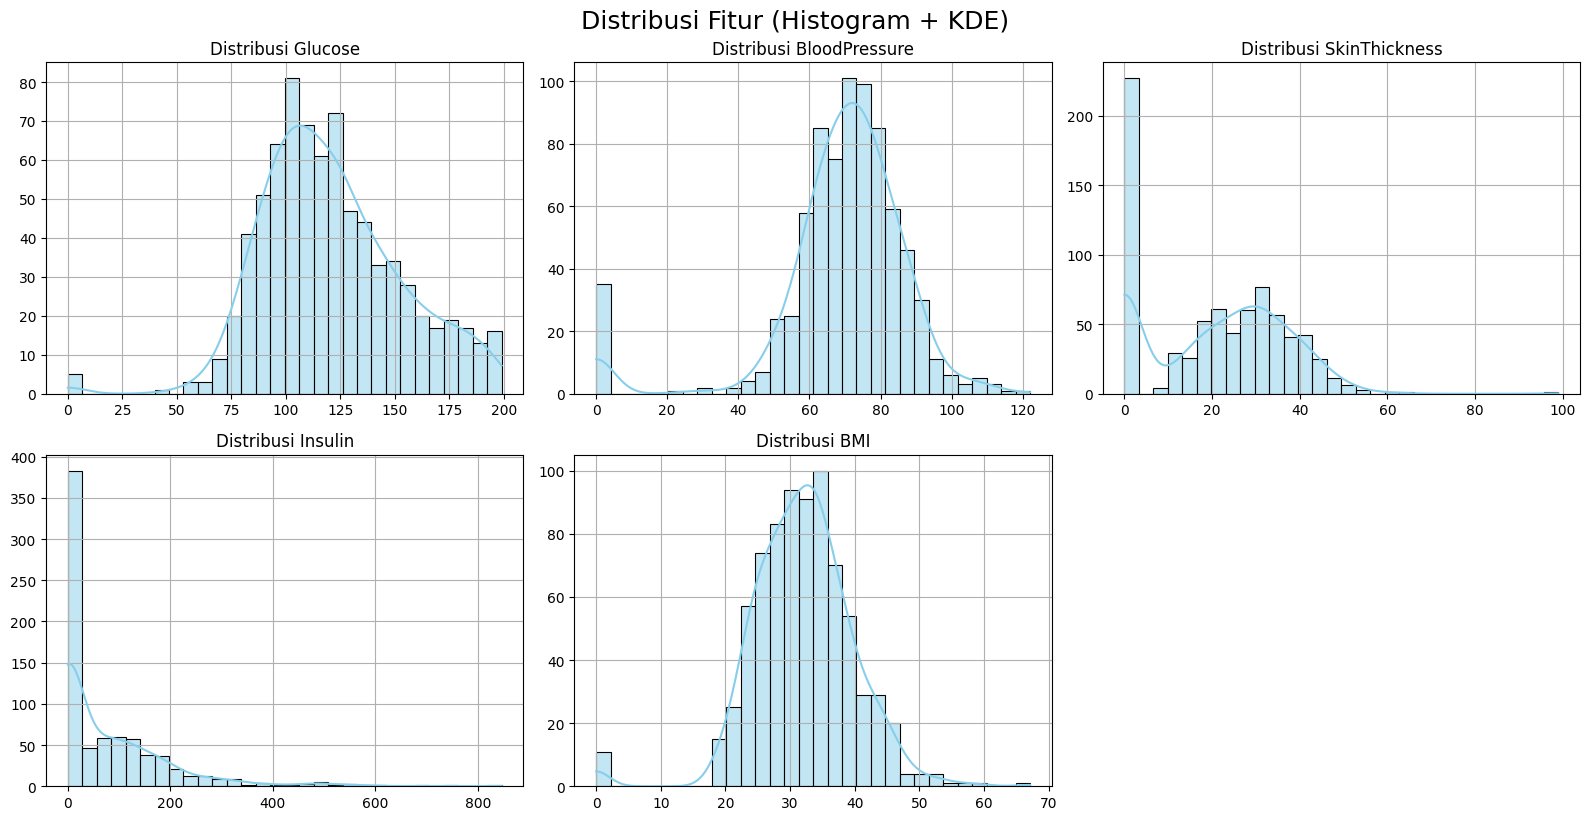

In [57]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Subplot
plt.figure(figsize=(16, 8))
for i, col in enumerate(invalid_cols, 1):
    plt.subplot(2, 3, i)  # 2 baris x 3 kolom (1 slot kosong)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribusi Fitur (Histogram + KDE)", fontsize=18, y=1.02)
plt.show()

In [58]:
print("🔍 Hasil Uji Normalitas (Shapiro-Wilk):\n")
for col in invalid_cols:
    stat, p = shapiro(data[col])
    print(f"{col}: p-value = {p:.4f} → ", end="")
    if p > 0.05:
        print("Distribusi kemungkinan **normal**")
    else:
        print("Distribusi kemungkinan **TIDAK normal**")

🔍 Hasil Uji Normalitas (Shapiro-Wilk):

Glucose: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**
BloodPressure: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**
SkinThickness: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**
Insulin: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**
BMI: p-value = 0.0000 → Distribusi kemungkinan **TIDAK normal**


Beberapa fitur dalam dataset mengandung nilai 0 yang tidak valid secara medis, seperti `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, dan `BMI`. Nilai 0 pada kolom-kolom tersebut diganti dengan `NaN` dan kemudian diimputasi menggunakan nilai median dari masing-masing kolom.

Pendekatan ini dipilih karena median lebih tahan terhadap outlier dan cocok untuk distribusi yang tidak normal. Kolom seperti `Insulin` dan `SkinThickness` memiliki proporsi missing value yang tinggi, namun tetap dipertahankan dengan imputasi untuk menjaga kelengkapan fitur dalam sistem fuzzy.

In [59]:
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
    data[col] = data[col].replace(0, np.nan)

for col in cols_to_fix:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    print(f"{col}: imputasi median = {median_val}")

Glucose: imputasi median = 117.0
BloodPressure: imputasi median = 72.0
SkinThickness: imputasi median = 29.0
Insulin: imputasi median = 125.0
BMI: imputasi median = 32.3


## Handling Outliers

Karena dataset berisi data klinis yang rentan memiliki nilai ekstrim yang valid secara medis, kami memilih tidak melakukan penghapusan atau penanganan outlier secara khusus. Hal ini dikarenakan nilai-nilai ekstrim tersebut berpotensi mengandung informasi penting terkait diagnosis diabetes dan sistem fuzzy yang kami gunakan dapat menangani nilai-nilai tersebut melalui membership function yang fleksibel


... for now

## Train Test Split

In [60]:
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # stratify biar distribusi kelas tetep balance

## Normalisasi

In [61]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Balikin jadi dataframe lagi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [63]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

X_train shape: (614, 8)
X_test shape: (154, 8)


In [64]:
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}\n")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

y_train distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

y_test distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [65]:
X_train_scaled.sample(n=5, random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
288,0.235294,0.279720,0.326531,0.108696,0.046639,0.053170,0.114031,0.083333
290,0.000000,0.153846,0.653061,0.239130,0.034294,0.382413,0.155902,0.000000
120,0.000000,0.741259,0.530612,0.532609,0.116598,0.715746,0.300668,0.066667
451,0.117647,0.545455,0.469388,0.239130,0.150892,0.218814,0.204009,0.033333
583,0.470588,0.307692,0.530612,0.239130,0.150892,0.419223,0.047216,0.350000


# 🧠 Implementasi Model Fuzzy System

## Definisikan Input & Output Fuzzy

In [66]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# DEFINISI VARIABLE INPUT FUZZY

# Glucose
glucose_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'Glucose')

# BMI
bmi_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BMI')

# Age
age_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'Age')

# DEFINSI OUTPUT FUZZY 
diabetes_fuzzy = ctrl.Consequent(np.arange(0, 1.0, 0.01), 'Diabetes')


## Membuat Membership Function

C:\Users\tsfai\Anaconda3\envs\env3.11\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x600 with 0 Axes>

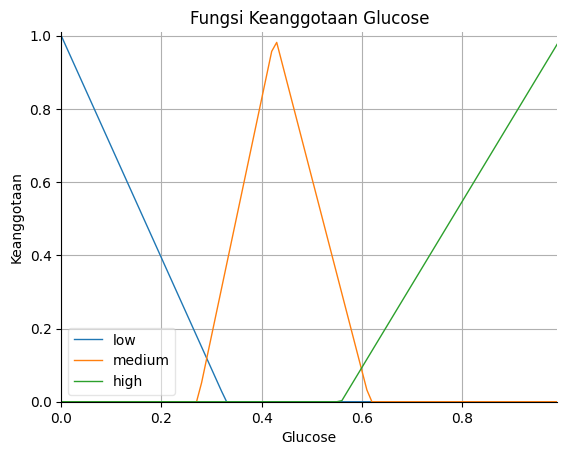

<Figure size 1000x600 with 0 Axes>

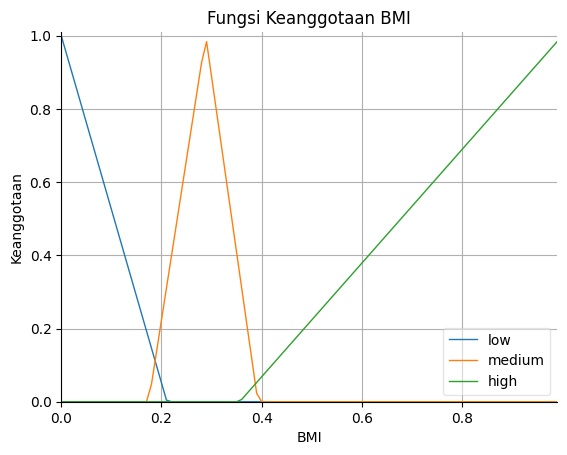

<Figure size 1000x600 with 0 Axes>

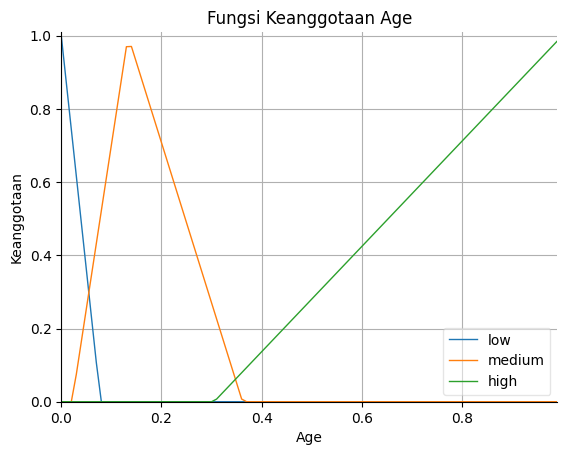

In [67]:
# Ambil nilai statistik dari data yang sudah dinormalisasi
def get_fuzzy_ranges(col):
    q1 = X_train_scaled[col].quantile(0.25)
    median = X_train_scaled[col].median()
    q3 = X_train_scaled[col].quantile(0.75)
    min_val = X_train_scaled[col].min()
    max_val = X_train_scaled[col].max()
    return min_val, q1, median, q3, max_val

# Offset
def calculate_offset(q1, q3):
    iqr = q3 - q1
    return 0.1 * iqr

# Glucose
glu_min, glu_q1, glu_med, glu_q3, glu_max = get_fuzzy_ranges('Glucose')
offset = calculate_offset(glu_q1, glu_q3)
glucose_fuzzy['low'] = fuzz.trimf(glucose_fuzzy.universe, [glu_min, glu_min, glu_q1 + offset])
glucose_fuzzy['medium'] = fuzz.trimf(glucose_fuzzy.universe, [glu_q1 - offset, glu_med, glu_q3 + offset])
glucose_fuzzy['high'] = fuzz.trimf(glucose_fuzzy.universe, [glu_q3 - offset, glu_max, glu_max])

# BMI
bmi_min, bmi_q1, bmi_med, bmi_q3, bmi_max = get_fuzzy_ranges('BMI')
offset = calculate_offset(bmi_q1, bmi_q3)
bmi_fuzzy['low'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_min, bmi_min, bmi_q1 + offset])
bmi_fuzzy['medium'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_q1 - offset, bmi_med, bmi_q3 + offset])
bmi_fuzzy['high'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_q3 - offset, bmi_max, bmi_max])

# Age
age_min, age_q1, age_med, age_q3, age_max = get_fuzzy_ranges('Age')
offset = calculate_offset(age_q1, age_q3)
age_fuzzy['low'] = fuzz.trimf(age_fuzzy.universe, [age_min, age_min, age_q1 + offset])
age_fuzzy['medium'] = fuzz.trimf(age_fuzzy.universe, [age_q1 - offset, age_med, age_q3 + offset])
age_fuzzy['high'] = fuzz.trimf(age_fuzzy.universe, [age_q3 - offset, age_max, age_max])

# Definisi Fungsi Keanggotaan untuk Output
diabetes_fuzzy['non_diabetes'] = fuzz.trimf(diabetes_fuzzy.universe, [0, 0, 0.5])
diabetes_fuzzy['diabetes'] = fuzz.trimf(diabetes_fuzzy.universe, [0.5, 1, 1])


# Menampilkan Fungsi Keanggotaan
def plot_fuzzy_sets(antecedent, title):
    plt.figure(figsize=(10, 6))
    antecedent.view()
    plt.title(title)
    plt.xlabel(antecedent.label)
    plt.ylabel('Keanggotaan')
    plt.grid()
    plt.show()

plot_fuzzy_sets(glucose_fuzzy, 'Fungsi Keanggotaan Glucose')
plot_fuzzy_sets(bmi_fuzzy, 'Fungsi Keanggotaan BMI')
plot_fuzzy_sets(age_fuzzy, 'Fungsi Keanggotaan Age')


## Menentukkan Fuzzy Rules

In [68]:
# ===== RULES UNTUK DIAGNOSIS "DIABETES" =====

# Kondisi kuat diabetes
rule1  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule2  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule3  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule4  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule5  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule6  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule7  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule8  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule9  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule10 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])

# ===== RULES UNTUK KONDISI "NON-DIABETES" =====

rule11 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule12 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule13 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule14 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule15 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule16 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule17 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule18 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule19 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule20 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])

# ===== RULES UNTUK KONDISI "BORDERLINE" =====

rule21 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule22 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule23 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule24 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule25 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule26 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule27 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule28 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule29 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule30 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])


## Implementasi Mamdani dan Sugeno? Manual atau library wan?

In [69]:
# penggabungan semua rule
diabetes_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
])

# Pembuatan objek untuk menyimpan hasil prediksi
diabetes_simulation = ctrl.ControlSystemSimulation(diabetes_ctrl)


In [84]:
from typing import List
from sklearn.metrics import accuracy_score, classification_report

def fuzzy_predict(X_scaled, fuzzy_simulation, threshold: float = 0.5) -> List[int]:
    predictions = []

    for i, row in X_scaled.iterrows():
        try:
            # Set input fuzzy
            fuzzy_simulation.input['Glucose'] = row['Glucose']
            fuzzy_simulation.input['BMI'] = row['BMI']
            fuzzy_simulation.input['Age'] = row['Age']

            # Hitung hasil
            fuzzy_simulation.compute()

            # Ambil hasil output
            output = fuzzy_simulation.output.get('Diabetes', None)

            # Ambil prediksi
            pred = 1 if output is not None and output >= threshold else 0

        except Exception as e:
            print(f"[Error] Indeks {i} - {e}")
            pred = 0  # Default jika error

        predictions.append(pred)

    return predictions

# Gunakan fungsi untuk memprediksi
y_pred_fuzzy = fuzzy_predict(X_test_scaled, diabetes_simulation, 0.55)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred_fuzzy))
print(classification_report(y_test, y_pred_fuzzy))


Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       100
           1       0.55      0.85      0.67        54

    accuracy                           0.70       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.77      0.70      0.71       154



# 📈 Evaluasi Model

## Evaluasi dengan Metrik

(accuracy, presisi, recall, F1-score, confusion matrix)

In [71]:
# Code here

# Analisis hasil

(misalnya: Mamdani lebih interpretatif, Sugeno lebih presisi, dst.)

In [72]:
# Code here

# 📝 Kesimpulan dan Analisis

Buatin kesimpulkan apa yang dipelajari, mana metode yang lebih baik, dan kenapanya

In [73]:
# Code here